In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
BACTH_LIST = [1, 10, 100, 1000]
LR_LIST = [0.01, 0.05, 0.1, 0.5, 1, 5]
OPTIMIZER_LIST = ['gd', 'adam', 'adagrad', 'lbfgs', 'adamw']

With produced data

In [228]:
df = pd.read_csv('results2.csv', sep = ',')
df

,optimizer,lr,batch size,num iteration,train loss,train accuracy,test loss,test accuracy,sharpness,non uniformity
0,gd,0.01,1000,7753,0.029343,99.900002,1.007227,78.699997,363.573364,1410.584941
1,adam,0.01,1000,95,0.002759,100.000000,1.602754,79.500000,66.141792,503.700432
2,adagrad,0.01,1000,568,0.003908,99.900002,1.181605,80.699997,69.962860,456.532926
3,lbfgs,0.01,1000,77,0.006605,100.000000,2.112868,78.300003,2975.436035,16716.417800
4,adamw,0.01,1000,141,0.002156,100.000000,2.037582,79.799995,78.135727,717.885241
5,gd,0.05,1000,2451,0.012455,99.900002,1.010540,79.099998,123.581818,616.558417


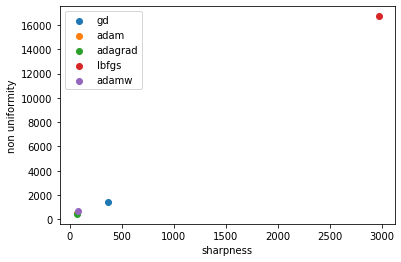

In [227]:
df_001 = df[df['lr'] == 0.01]

for optimizer in OPTIMIZER_LIST:
    plt.scatter(df_001[df_001['optimizer'] == optimizer]['sharpness'], 
                df_001[df_001['optimizer'] == optimizer]['non uniformity'], 
                label = optimizer)
    plt.xlabel('sharpness')
    plt.ylabel('non uniformity')
    plt.legend(loc = 'best')

With fake data

In [206]:
df2 = pd.read_csv('results3.csv', sep = ',')
df2

,optimizer,lr,batch size,sharpness,non uniformity
0,gd,0.5,1000,3.550000,13.120000
1,gd,0.5,1000,3.770000,11.020000
2,gd,0.5,1000,3.810000,11.200000
3,gd,0.5,1000,3.690000,14.660000
4,gd,0.5,1000,3.340000,14.670000
5,sgd,0.5,25,2.790000,5.290000
6,sgd,0.5,25,2.650000,9.550000
7,sgd,0.5,25,2.260000,9.120000
8,sgd,0.5,25,2.490000,5.490000
9,sgd,0.5,25,2.500000,5.640000


In [142]:
# COLOR_LIST = ['blue', 'orange', 'green', 'red', 'yellow', 'purple', 'pink']
COLOR_LIST = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C6', 'C7', 'C7', 'C8', 'C9']

In [201]:
def get_sharpness_ub(lr):
    return 2/lr

def get_nonuniformity_ub(lr, n = 1000, B = 1000):
    '''
    n: number of data
    lr: learning rate
    B: batch size
    '''
    return np.sqrt(B*(n-1)/(n-B+1))/lr

In [225]:
# figure5: sharpness and non-uniformity change w.r.t. batch size 

def plot_B(df, lr = 0.5, n = 1000, ymax = 15):
    '''
    plot nonuniformity against sharpness for a fixed learning rate but different batch size
    '''
    df_lr = df[df['lr'] == lr]
    
#     f, ax = plt.subplots(figsize = (5, 4))
    plt.vlines(get_sharpness_ub(lr), 0, ymax, 
               colors = 'gray', linestyles = '-', linewidth = 0.8)
    plt.text(get_sharpness_ub(lr)-0.3, 1, '2/'+r'$\eta$', c='gray')
    i = 0
    for _, optimizer, batch_size in df_lr[['optimizer', 'batch size']].drop_duplicates().itertuples():
        data = df[(df['optimizer'] == optimizer) & (df['batch size'] == batch_size)]
        plt.scatter(data['sharpness'], data['non uniformity'],
                    c = COLOR_LIST[i], label = optimizer+', B='+str(batch_size))
        plt.hlines(get_nonuniformity_ub(lr, n = n, B = batch_size), 0, get_sharpness_ub(lr),
                   color = COLOR_LIST[i], linestyles = '--', linewidth = 3)
        i += 1
        if i > 9:
            raise ValueError('color out of range')
    plt.xlabel('sharpness', fontsize = 15)
    plt.ylabel('non-uniformity', fontsize = 15)
    plt.ylim(0, ymax)
    plt.xlim(0, get_sharpness_ub(lr)+0.2)
    plt.legend(loc = 'best')
    plt.savefig('Sharpness vs Nonuniformity for different batch size (lr='+str(lr)+'.pdf')
    
    
def plot_lr(df, batch_size = 10, n = 1000, ymax = 32):
    '''
    plot nonuniformity against sharpness for a fixed batch size but different learning rate
    '''
    df_bs = df[df['batch size'] == batch_size]
    
    i = 0
    for _, optimizer, lr in df_bs[['optimizer', 'lr']].drop_duplicates().itertuples():
        data = df[(df['optimizer'] == optimizer) & (df['lr'] == lr)]
        plt.scatter(data['sharpness'], data['non uniformity'],
                    c = COLOR_LIST[i], label = optimizer+', lr='+str(lr))
        plt.hlines(get_nonuniformity_ub(lr, n = n, B = batch_size), 0, get_sharpness_ub(lr),
                   color = COLOR_LIST[i], linestyles = '--', linewidth = 3)
        plt.vlines(get_sharpness_ub(lr), 0, get_nonuniformity_ub(lr, n = n, B = batch_size), 
                   colors = COLOR_LIST[i], linestyles = '--', linewidth = 3)
        i += 1
        if i > 9:
            raise ValueError('color out of range')
    plt.xlabel('sharpness', fontsize = 15)
    plt.ylabel('non-uniformity', fontsize = 15)
    plt.ylim(0, ymax)
    plt.xlim(0, get_sharpness_ub(lr)+1)
    plt.legend(loc = 'best')
    plt.savefig('Sharpness vs Nonuniformity for different learning rate (bs='+str(batch_size)+'.pdf')

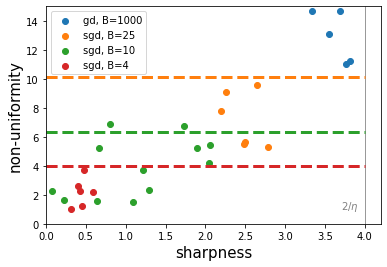

In [220]:
plot_B(df2)

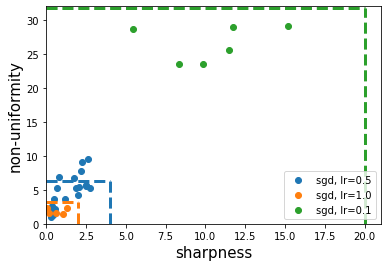

In [221]:
plot_lr(df2)

In [224]:
B = 10
for lr in LR_LIST:
    print('lr = ', lr, 
          ', sharpness = ', round(get_sharpness_ub(lr),2), 
          ', non-uniformity = ', round(get_nonuniformity_ub(lr, B = B),2))

lr =  0.01 , sharpness =  200.0 , non-uniformity =  317.5
lr =  0.05 , sharpness =  40.0 , non-uniformity =  63.5
lr =  0.1 , sharpness =  20.0 , non-uniformity =  31.75
lr =  0.5 , sharpness =  4.0 , non-uniformity =  6.35
lr =  1 , sharpness =  2.0 , non-uniformity =  3.18
lr =  5 , sharpness =  0.4 , non-uniformity =  0.64
